# LOGIT Example using Gemini Code Assist

20th Feb 2025

## Step 1. Load Necessary Libraries

In [18]:
import statsmodels.api as sm
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2. Load and Describe Data

spector_data from Spector and Mazzeo (1980). https://www.tandfonline.com/doi/abs/10.1080/00220485.1980.10844952

 Variable name definitions::

        Grade - binary variable indicating whether or not a student's grade
                improved.  1 indicates an improvement.
        TUCE  - Test score on economics test
        PSI   - participation in program
        GPA   - Student's grade point average

In [20]:
spector_data = sm.datasets.spector.load_pandas()
df = spector_data.data


## Step 3: Visualize and Summarize Data

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GPA     32 non-null     float64
 1   TUCE    32 non-null     float64
 2   PSI     32 non-null     float64
 3   GRADE   32 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0


***Use Code Assist: Look at the prompt!***

             GPA       TUCE        PSI      GRADE
count  32.000000  32.000000  32.000000  32.000000
mean    3.117188  21.937500   0.437500   0.343750
std     0.466713   3.901509   0.504016   0.482559
min     2.060000  12.000000   0.000000   0.000000
25%     2.812500  19.750000   0.000000   0.000000
50%     3.065000  22.500000   0.000000   0.000000
75%     3.515000  25.000000   1.000000   1.000000
max     4.000000  29.000000   1.000000   1.000000
            GPA      TUCE       PSI     GRADE
GPA    1.000000  0.386986  0.039683  0.497147
TUCE   0.386986  1.000000  0.112780  0.303055
PSI    0.039683  0.112780  1.000000  0.422760
GRADE  0.497147  0.303055  0.422760  1.000000


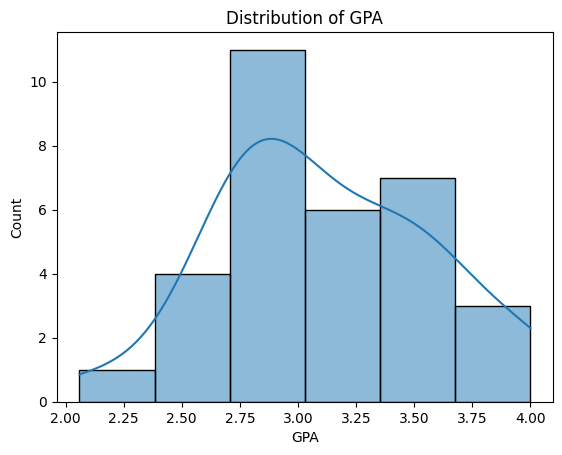

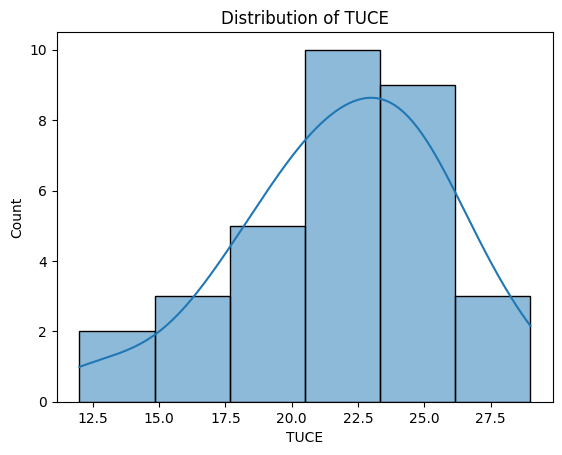

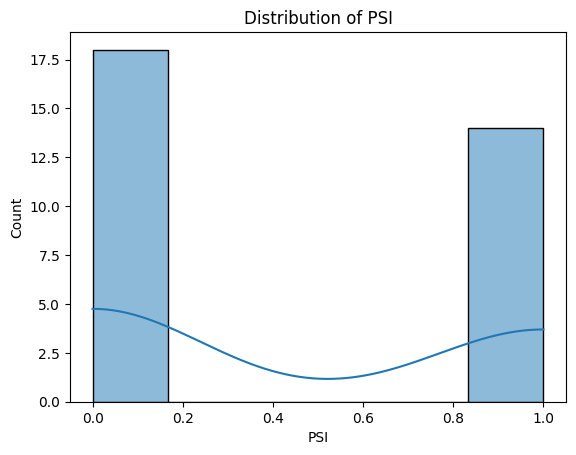

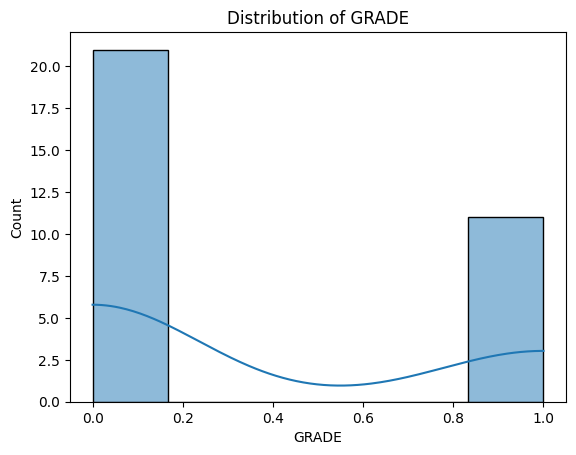

In [24]:
# prompt: Summary Statistics, Correlation Table and Distributions

# Summary Statistics
print(df.describe())

# Correlation Table
print(df.corr())

# Distributions
for col in df.columns:
  plt.figure()
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()


## Step 4: Run a Logistic or Logit Regression

***Use Code Assist: Look at the prompt!***

In [25]:
# prompt: Run a logit regression mode to predict Grade

# Dependent variable
dependent_var = df["GRADE"]

# Independent variables
independent_vars = df[["TUCE", "PSI", "GPA"]]

# Add a constant to the independent variables
independent_vars = sm.add_constant(independent_vars)

# Fit the logit model
logit_model = sm.Logit(dependent_var, independent_vars)
logit_results = logit_model.fit()

# Print the model summary
print(logit_results.summary())


Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.3740
Time:                        21:16:52   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
TUCE           0.0952      0.

## Step 5: Interpret Results

***Use Code Assist: Look at the prompt!***

In [26]:
# prompt: Interpret effect of change in GPA by 1 point in terms of logodds, odds, and probability

# Extract the coefficient for GPA
gpa_coef = logit_results.params["GPA"]

# Calculate the change in log-odds for a 1-point increase in GPA
logodds_change = gpa_coef * 1

# Calculate the odds ratio
odds_ratio = math.exp(logodds_change)

# Example:  Assume the baseline probability is derived from the average GPA in the dataset.
#  We can use the predicted probability at the mean GPA in the sample.
mean_gpa = df["GPA"].mean()
baseline_logodds = logit_results.params["const"] + logit_results.params["TUCE"] * df["TUCE"].mean() + logit_results.params["PSI"]* df["PSI"].mean() + logit_results.params["GPA"] * mean_gpa
baseline_odds = math.exp(baseline_logodds)
baseline_probability = baseline_odds / (1 + baseline_odds)

# Calculate the new log-odds and probability after a 1-point increase in GPA.
new_logodds = baseline_logodds + logodds_change
new_odds = math.exp(new_logodds)
new_probability = new_odds / (1 + new_odds)


print(f"Change in Log-odds for a 1-point increase in GPA: {logodds_change:.4f}")
print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"Baseline Probability (at mean GPA): {baseline_probability:.4f}")
print(f"New Probability (after a 1-point increase in GPA): {new_probability:.4f}")

print(f"Probability Increase: {new_probability - baseline_probability:.4f}")


Change in Log-odds for a 1-point increase in GPA: 2.8261
Odds Ratio: 16.8797
Baseline Probability (at mean GPA): 0.2528
New Probability (after a 1-point increase in GPA): 0.8510
Probability Increase: 0.5982


***Now explain the effect of variable  PSI   - participation in program ***

Welcome to use code assist!


# **Example with Manual Coding for Reference:**

Note -- there are multiple ways of doing the same thing

In [46]:
# Load Data
spector_data = sm.datasets.spector.load_pandas()

#look at data
print("******************************************")
print("Complete Data ")
print(spector_data.data.head())

# Define InDependent Vars or Exogenous Variables
spector_data.exog = sm.add_constant(spector_data.exog)
print("******************************************")
print("Exogenous or InDependent Variables to predict/explain: adding constant ")
print(spector_data.exog.head()) # Notice our independent variable or prediction var is not here. We also added a constant

# Check Engdogenous Var data
print("******************************************")
print("Engodenous or Dependent Variable to predict/explain: Grade")
print(spector_data.endog.head())

******************************************
Complete Data 
    GPA  TUCE  PSI  GRADE
0  2.66  20.0  0.0    0.0
1  2.89  22.0  0.0    0.0
2  3.28  24.0  0.0    0.0
3  2.92  12.0  0.0    0.0
4  4.00  21.0  0.0    1.0
******************************************
Exogenous or InDependent Variables to predict/explain: adding constant 
   const   GPA  TUCE  PSI
0    1.0  2.66  20.0  0.0
1    1.0  2.89  22.0  0.0
2    1.0  3.28  24.0  0.0
3    1.0  2.92  12.0  0.0
4    1.0  4.00  21.0  0.0
******************************************
Engodenous or Dependent Variable to predict/explain: Grade
0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: GRADE, dtype: float64


In [49]:
# Building a Logit Model
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)
# Fit the logit_mod Model
logit_res = logit_mod.fit()
# Print Model Results
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.3740
Time:                        21:28:17   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.

***Interpreting effects of GPA***

In [63]:
print("\n Interpretation of effect of GPA on Grade Improvement")
#Interpret Model  -- see effect of GPA from coefficient value
print ("Interpretation of Model: A change in gpa by 1 changes log odds of Grade Improvement by 2.8261")
# Let's convert  log odds to odds:
print( "Interpretation of Model: A change in gpa by 1 changes odds of Grade Improvement by:", math.exp(2.8261))
# Let's convert  odds to probability:
print( "Interpretation of Model: A change in gpa by 1 changes probability of Grade Improvement by:", math.exp(2.8261)/(1+math.exp(2.8261)))


 Interpretation of effect of GPA on Grade Improvement
Interpretation of Model: A change in gpa by 1 changes log odds of Grade Improvement by 2.8261
Interpretation of Model: A change in gpa by 1 changes odds of Grade Improvement by: 16.87950223018679
Interpretation of Model: A change in gpa by 1 changes probability of Grade Improvement by: 0.9440700313059245


***Interpreting effects of    TUCE and PSI ***

In [62]:
print("\n Interpretation of effect of TUCE on Grade Improvement")
#Interpret Model  -- see effect of TUCE from coefficient value
print ("Interpretation of Model: Change in TUCE by 1 changes log odds of Grade Improvement by:",logit_res.params["TUCE"])
# Let's convert  log odds to odds:
print( "Interpretation of Model: A change in TUCE by 1 changes odds of Grade Improvement by:", math.exp(logit_res.params["TUCE"]))
# Let's convert  odds to probability:
print( "Interpretation of Model: A change in TUCE by 1 changes probability of Grade Improvement by:", math.exp(logit_res.params["TUCE"])/(1+math.exp(logit_res.params["TUCE"])))

print("\n Interpretation of effect of PSI on Grade Improvement")
#Interpret Model  -- see effect of PSI from coefficient value
print ("Interpretation of Model: Change in PSI by 1 changes log odds of Grade Improvement by:",logit_res.params["PSI"])
# Let's convert  log odds to odds:
print( "Interpretation of Model: A change in PSI by 1 changes odds of Grade Improvement by:", math.exp(logit_res.params["PSI"]))
# Let's convert  odds to probability:
print( "Interpretation of Model: A change in TUCE by 1 changes probability of Grade Improvement by:", math.exp(logit_res.params["PSI"])/(1+math.exp(logit_res.params["PSI"])))


 Interpretation of effect of TUCE on Grade Improvement
Interpretation of Model: Change in TUCE by 1 changes log odds of Grade Improvement by: 0.09515766131790943
Interpretation of Model: A change in TUCE by 1 changes odds of Grade Improvement by: 1.0998322424583313
Interpretation of Model: A change in TUCE by 1 changes probability of Grade Improvement by: 0.5237714805115705

 Interpretation of effect of PSI on Grade Improvement
Interpretation of Model: Change in PSI by 1 changes log odds of Grade Improvement by: 2.378687655093354
Interpretation of Model: A change in PSI by 1 changes odds of Grade Improvement by: 10.790732404989537
Interpretation of Model: A change in TUCE by 1 changes probability of Grade Improvement by: 0.9151876265483877



 **Recall: Interpretation for Logit Models**


Remember Logistic regression returns information in log odds. Look up class slides on odds, log-odds and probability

As X changes by some value delta, Y changes by Log-odds the Coeffecient of X times delta, i.e., if X changes by 1 unit, Y changes by Log-Odds times the coefficient of X

As you interpret how a change in variable X affects Y, you must at minimum convert log odds to odds (and if you want probability, then odds to probability

Here's an online calculator: http://vassarstats.net/tabs_odds.html

Recall:

Log-Odds = Ln(OddsRatio)

OddsRatio (OR) = p / (1-p)

 This implies p = OR - P(OR)

             i.e.,  p(1+OR)=OR

             giving p=OR/(1+OR)

coeffecient values in logit regressions are essentially log(OR) values

Therefore you need np.exp(Coeff)= to convert to Odds Ratio

i.e., change in X by 1 unit changes the Odds of Y by the np.exp(Coeff) value

To convert to probability, you need p = np.exp(Coeff))/(1+np.exp(Coeff))

see: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
